# Adaptive-Runge–Kutta

Compile, run, and plot the result from RKF.cpp

In [1]:
import subprocess
import sys

import os

import time

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'


from scipy.integrate import odeint
from scipy.integrate import RK45 #this is DP45 as the one I use


In [3]:
os.chdir('..')
os.system(r'make')
os.chdir('0-test')

In [4]:
time0=time.time()

output=subprocess.check_output(["../RKF.run"]).decode(sys.stdout.encoding).split("\n")

print("time: {:10} s".format( time.time()-time0)  )


N=int(output[0])
N_full=int(output[1])

solution=np.array([ i.split(' ')   for i in output[2:N+2] ] ,np.float64)

Deltas=np.array(output[N+2:N+2+N_full],np.float64)

solution_full=np.array([ i.split(' ')   for i in output[N+2+N_full:-1] ] ,np.float64)

time: 0.02478194236755371 s


In [5]:
t=solution[:,0]
y1=solution[:,1]
y2=solution[:,2]
y3=solution[:,3]


err1=solution[:,4]
err2=solution[:,5]
err3=solution[:,6]


hist=solution[:,7]



if N_full!=0:
    t_full=solution_full[:,0]
    y1_full=solution_full[:,1]
    y2_full=solution_full[:,2]
    y3_full=solution_full[:,3]

In [6]:
def f(t,y):
    lhs=np.zeros(3)
    lhs[0]=-20*y[0]*pow(t,2) ;
    lhs[1]=5*y[0]*pow(t,2)+2*(-pow( y[1],2  )+pow( y[2],2 ) )*pow(t,1);
    lhs[2]=15*y[0]*pow(t,2)+2*(pow( y[1],2  )-pow( y[2],2 ) )*pow(t,1);
    return lhs

In [7]:
# ?RK45

In [8]:
sol_py=RK45(f,0,[y1[0],y2[0],y3[0]],t_full[-1],rtol=1e-8,atol=1e-8)

time0=time.time()

y_py=[]
t_py=[]
while sol_py.status=='running' :
    sol_py.step()
    y_py.append(sol_py.y)
    t_py.append(sol_py.t)
#     print(sol_py.step_size,sol_py.t)
y_py=np.array(y_py)

print("time: {:10} s".format( time.time()-time0)  )


time: 0.3165459632873535 s


In [9]:
def g(y,t):
    return f(t,y)

In [10]:
time0=time.time()
sol_ode=odeint(g,y_py[0],t_py )
print("time: {:10} s".format( time.time()-time0)  )

time: 0.009407997131347656 s


<IPython.core.display.Javascript object>


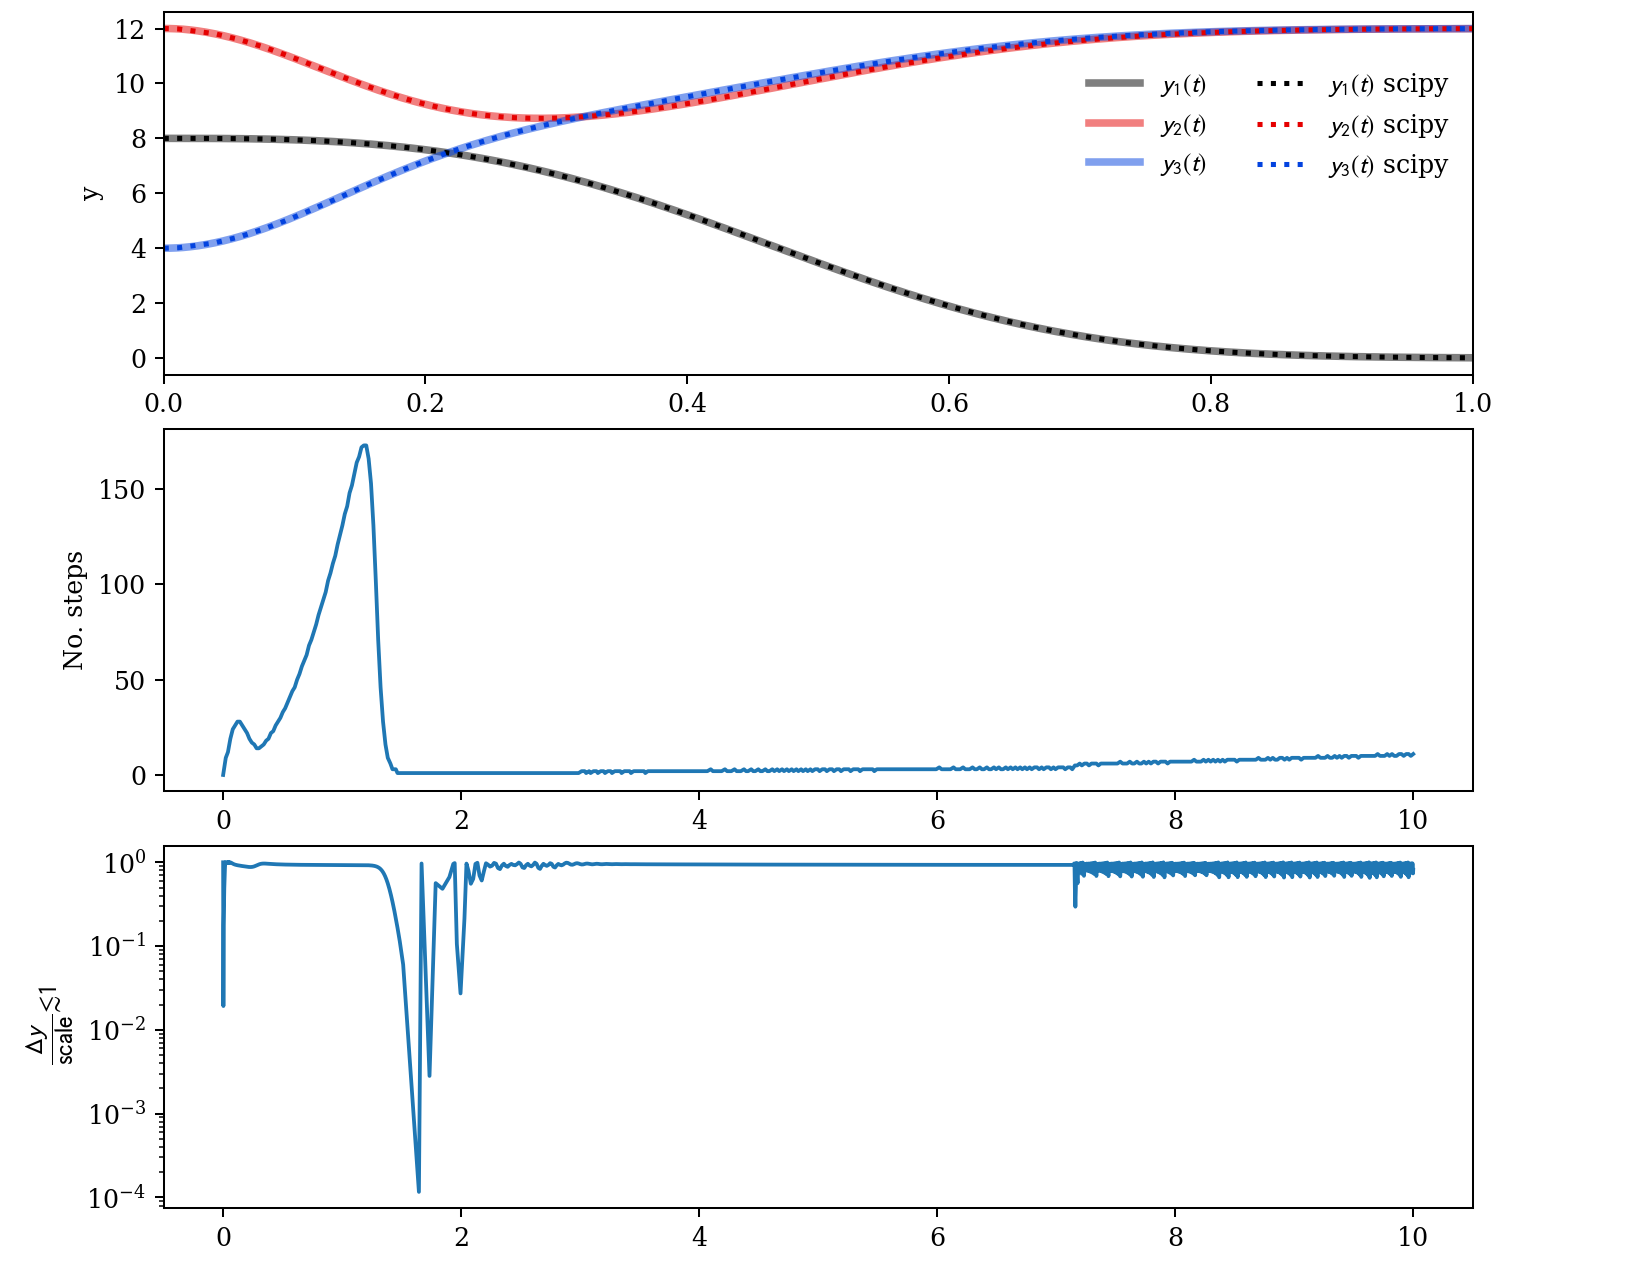

In [11]:
fig=plt.figure(figsize=(9,7))
fig.subplots_adjust(bottom=0.05, left=0.1, top = 0.99, right=0.9,wspace=0.0,hspace=0.15)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(t_full,y1_full,c=_c[0],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{1}(t)$')
sub.plot(t_full,y2_full,c=_c[1],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{2}(t)$')
sub.plot(t_full,y3_full,c=_c[2],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{3}(t)$')


sub.plot(t_py,y_py[:,0],c=_c[0],alpha=1,linestyle=':',linewidth=2,label=r'$y_{1}(t)$ scipy')
sub.plot(t_py,y_py[:,1],c=_c[1],alpha=1,linestyle=':',linewidth=2,label=r'$y_{2}(t)$ scipy')
sub.plot(t_py,y_py[:,2],c=_c[2],alpha=1,linestyle=':',linewidth=2,label=r'$y_{3}(t)$ scipy')


# sub.plot(t_py,sol_ode[:,0],c=_c[0],alpha=1,linestyle='--',linewidth=2,label=r'$y_{1}(t)$ scipy-odeint')
# sub.plot(t_py,sol_ode[:,1],c=_c[1],alpha=1,linestyle='--',linewidth=2,label=r'$y_{2}(t)$ scipy-odeint')
# sub.plot(t_py,sol_ode[:,2],c=_c[2],alpha=1,linestyle='--',linewidth=2,label=r'$y_{3}(t)$ scipy-odeint')



sub.legend(framealpha=0,ncol=2,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('y')   
sub.set_xlim(0,1)   



sub = fig.add_subplot(312)    
sub.plot(t,hist)
# sub.hist(t_full,bins=N) #this should look similar
sub.set_ylabel('No. steps')
sub.set_xlabel('t')  

sub = fig.add_subplot(313)    
sub.plot(t_full,Deltas)
sub.set_yscale('log')
sub.set_ylabel(r' $\dfrac{\Delta y}{\rm scale} \lesssim 1$ ')
sub.set_xlabel('')  



plt.show()

<IPython.core.display.Javascript object>


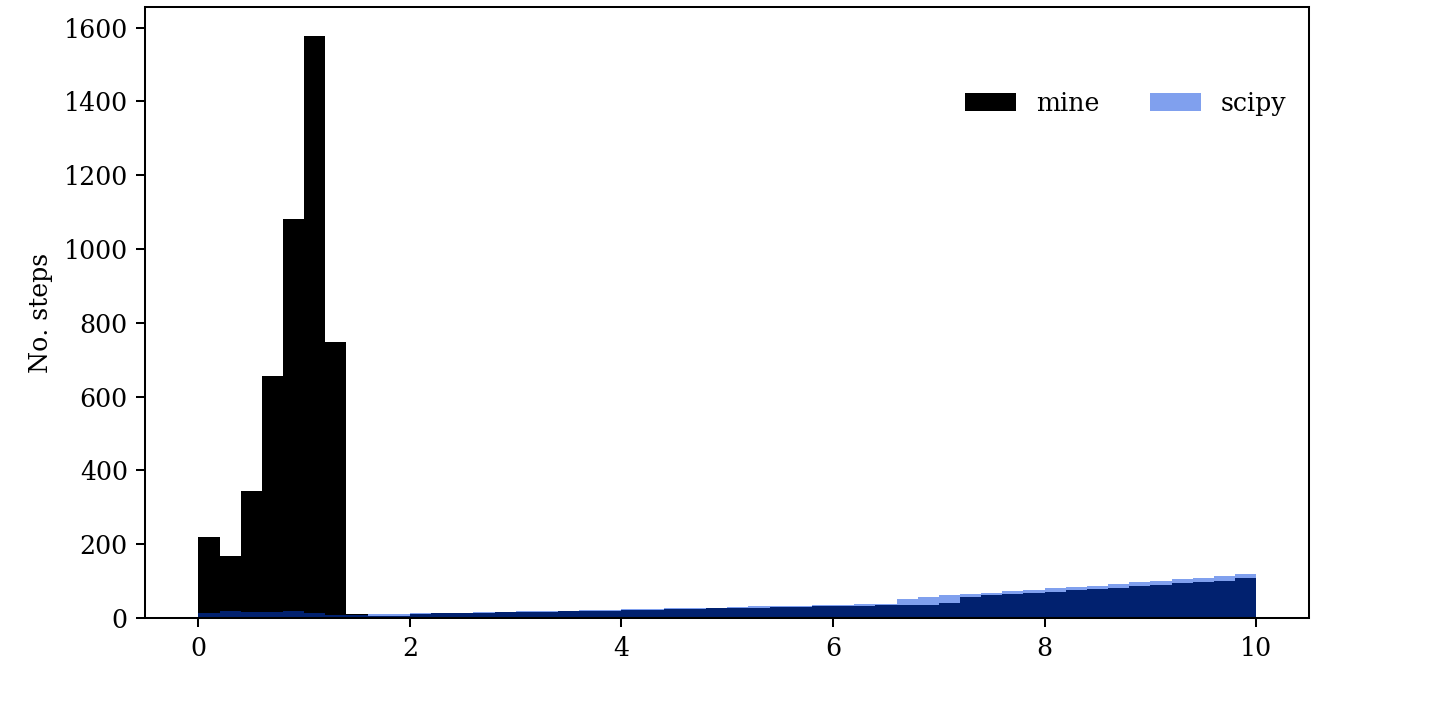

In [12]:
fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.99, right=0.9,wspace=0.0,hspace=0.2)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)

sub.hist(t_full,color=_c[0],label=r'mine',bins=int(t_full[-1]*5))
sub.hist(t_py,color=_c[2],label=r'scipy',alpha=0.5,bins=int(t_full[-1]*5))

# check also this
# sub.plot(t,hist,label=r'mine')
# sub.hist(t_py,label=r'scipy',alpha=0.5,bins=N)



sub.set_ylabel('No. steps')


sub.legend(framealpha=0,ncol=2,loc='upper right',bbox_to_anchor=(1,.9))





plt.show()

In [13]:
N_full

6573

In [14]:
len(t_py)

2140